In [1]:
#Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading in the csv files

#Creates two variables containing the locations of each csv
csvpath1 = "csvFiles/googleplaystore.csv"
csvpath2 = "csvFiles/googleplaystore_user_reviews.csv"

#Translates the csv files into pandas dataframes
rawGoogleApps = pd.read_csv(csvpath1)
rawGoogleReviews = pd.read_csv(csvpath2)

In [3]:
#Cleaning the datasets

#Pulls every column from rawGoogleApps aside from update versions
googleApps = rawGoogleApps[["App", "Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price",
                            "Content Rating", "Last Updated"]]

#Pulls only the App and Sentiment columns from rawGoogleReviews
googleReviews = rawGoogleReviews[["App", "Sentiment"]]

#Modifies column names
googleApps = googleApps.rename(columns={"Last Updated": "Updated",
                                       "Price": "Price in Dollars",
                                       "Size": "Kilobytes",
                                       "Content Rating": "Maturity"})

#Drops rows that are lacking information
googleReviews = googleReviews.dropna()
googleApps = googleApps.dropna()

#Changes the Category column for googleApps to make it more readable
googleApps["Category"] = googleApps["Category"].replace({"ART_AND_DESIGN": "Art and Design",
                                                        "AUTO_AND_VEHICLES": "Auto and Vehicles",
                                                        "BEAUTY": "Beauty",
                                                        "BOOKS_AND_REFERENCE": "Books and Reference",
                                                        "BUSINESS": "Business",
                                                        "COMICS": "Comics",
                                                        "COMMUNICATION": "Communication",
                                                        "DATING": "Dating",
                                                        "EDUCATION": "Education",
                                                        "ENTERTAINMENT": "Entertainment",
                                                        "EVENTS": "Events",
                                                        "FINANCE": "Finance",
                                                        "FOOD_AND_DRINK": "Food and Drink",
                                                        "HEALTH_AND_FITNESS": "Health and Fitness",
                                                        "HOUSE_AND_HOME": "House and Home",
                                                        "LIBRARIES_AND_DEMO": "Libraries and Demo",
                                                        "LIFESTYLE": "Lifestyle",
                                                        "GAME": "Game",
                                                        "FAMILY": "Family",
                                                        "MEDICAL": "Medical",
                                                        "SOCIAL": "Social",
                                                        "SHOPPING": "Shopping",
                                                        "PHOTOGRAPHY": "Photography",
                                                        "SPORTS": "Sports",
                                                        "TRAVEL_AND_LOCAL": "Travel and Local",
                                                        "TOOLS": "Tools",
                                                        "PERSONALIZATION": "Personalization",
                                                        "PRODUCTIVITY": "Productivity",
                                                        "PARENTING": "Parenting",
                                                        "WEATHER": "Weather",
                                                        "VIDEO_PLAYERS": "Video Players",
                                                        "NEWS_AND_MAGAZINES": "News and Magazines",
                                                        "MAPS_AND_NAVIGATION": "Maps and Navigation"})

#Drops rows with values which won't be applicable to our experiments
googleApps = googleApps[googleApps.Kilobytes != 'Varies with device']
googleApps = googleApps[googleApps.Maturity != 'Unrated']
googleApps = googleApps[googleApps.Maturity != 'Adults only 18+']

#Removes the +, $ and other symbols to allow the values to be calculated in the future
googleApps["Installs"] = googleApps["Installs"].str.replace('+', '', regex=True)
googleApps["Installs"] = googleApps["Installs"].str.replace(',', '', regex=True)
googleApps["Price in Dollars"] = googleApps["Price in Dollars"].str.replace('$', '', regex=True)
googleApps["Kilobytes"] = googleApps["Kilobytes"].str.replace('M', '000', regex=True)
googleApps["Kilobytes"] = googleApps["Kilobytes"].str.replace('.', '', regex=True)
googleApps["Kilobytes"] = googleApps["Kilobytes"].str.replace('k', '', regex=True)

#Sets data to a numeric value to allow values to be calculated in the future
googleApps["Installs"] = pd.to_numeric(googleApps["Installs"])
googleApps["Reviews"] = pd.to_numeric(googleApps["Reviews"])
googleApps["Price in Dollars"] = pd.to_numeric(googleApps["Price in Dollars"])
googleApps["Kilobytes"] = pd.to_numeric(googleApps["Kilobytes"])

#Drops rows with duplicate app names, since they would cause our data to become inaccurate
googleApps = googleApps.drop_duplicates(subset='App',keep='last')

#Displays the dataframe
googleApps.head()

,App,Category,Rating,Reviews,Kilobytes,Installs,Type,Price in Dollars,Maturity,Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and Design,4.1,159,19000,10000,Free,0.0,Everyone,"January 7, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and Design,4.7,87510,87000,5000000,Free,0.0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,Art and Design,4.5,215644,25000,50000000,Free,0.0,Teen,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,Art and Design,4.3,967,28000,100000,Free,0.0,Everyone,"June 20, 2018"
5,Paper flowers instructions,Art and Design,4.4,167,56000,50000,Free,0.0,Everyone,"March 26, 2017"


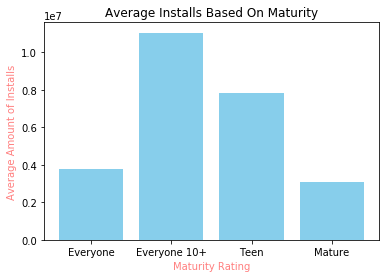

In [4]:
#Creates variables for the average ratings based off of maturity
eInstalls = round(googleApps.loc[googleApps["Maturity"] == "Everyone"]["Installs"].mean(), 2)
eTenInstalls = round(googleApps.loc[googleApps["Maturity"] == "Everyone 10+"]["Installs"].mean(), 2)
tInstalls = round(googleApps.loc[googleApps["Maturity"] == "Teen"]["Installs"].mean(), 2)
mInstalls = round(googleApps.loc[googleApps["Maturity"] == "Mature 17+"]["Installs"].mean(), 2)

#Sets lists for the bar chart
averageInstalls = [eInstalls, eTenInstalls, tInstalls, mInstalls]
ratingNames = ["Everyone", "Everyone 10+", "Teen", "Mature"]

#Creates X axis for bar chart
xAxis = np.arange(len(averageInstalls))

#Creates the bar chart
plt.bar(xAxis, averageInstalls, color='skyblue', alpha=1.00, align="center")

#Adds formatting to the bar chart
plt.title("Average Installs Based On Maturity")
tick_locations = [value for value in xAxis]
plt.xticks(tick_locations, ratingNames)
plt.xlabel("Maturity Rating", color = "red", alpha = 0.5)
plt.ylabel("Average Amount of Installs", color = "red", alpha = 0.5)

#Displays the bar chart
plt.show()

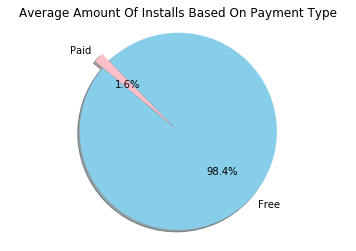

In [5]:
#Creates variables for the average number of installs to compare free vs paid apps
freeInstalls = round(googleApps.loc[googleApps["Type"] == "Free"]["Installs"].mean(), 2)
paidInstalls = round(googleApps.loc[googleApps["Type"] == "Paid"]["Installs"].mean(), 2)

#Creates variables to create the pie chart
typeInstalls = (freeInstalls, paidInstalls)
explode = (0, 0.1)
colors = ["skyblue", "pink"]
labels = ["Free", "Paid"]

#Creates the pie chart
plt.pie(typeInstalls, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Adds formatting to the pie chart
plt.title("Average Amount Of Installs Based On Payment Type")
plt.axis("equal")

#Displays the pie chart
plt.show()

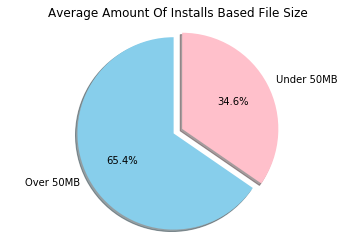

In [6]:
#Creates variables for the average number of installs for apps of each size
bigApps = googleApps.loc[googleApps["Kilobytes"] >= 50000]["Installs"].mean()
smallApps = googleApps.loc[googleApps["Kilobytes"] <= 50000]["Installs"].mean()

#Creates variables to create the pie chart
appSizeInstalls = (bigApps, smallApps)
explode = (0, 0.1)
colors = ["skyblue", "pink"]
labels = ["Over 50MB", "Under 50MB"]

#Creates the pie chart
plt.pie(appSizeInstalls, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

#Adds formatting to the pie chart
plt.title("Average Amount Of Installs Based File Size")
plt.axis("equal")

#Displays the pie chart
plt.show()

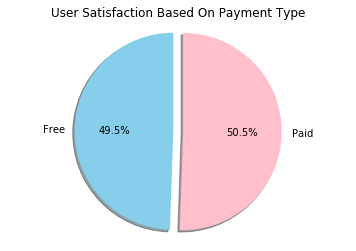

In [7]:
#Creates variables for the average ratings based off of maturity
freeRating = round(googleApps.loc[googleApps["Type"] == "Free"]["Rating"].mean(), 2)
paidRating = round(googleApps.loc[googleApps["Type"] == "Paid"]["Rating"].mean(), 2)

#Sets lists for the bar chart
typeRatings = [freeRating, paidRating]
explode = (0, 0.1)
colors = ["skyblue", "pink"]
labels = ["Free", "Paid"]

#Creates the pie chart
plt.pie(typeRatings, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

#Adds formatting to the pie chart
plt.title("User Satisfaction Based On Payment Type")
plt.axis("equal")

#Displays the pie chart
plt.show()

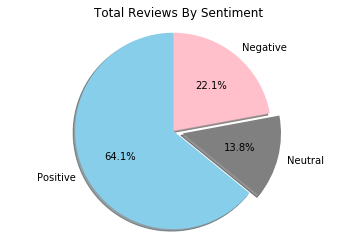

In [14]:
positiveReviews = len(googleReviews.loc[googleReviews["Sentiment"] == "Positive"])
neutralReviews = len(googleReviews.loc[googleReviews["Sentiment"] == "Neutral"])
negativeReviews = len(googleReviews.loc[googleReviews["Sentiment"] == "Negative"])

totalReviews = [positiveReviews, neutralReviews, negativeReviews]
explode = (0, 0.1, 0)
colors = ["skyblue", "grey", "pink"]
labels = ["Positive", "Neutral", "Negative"]

#Creates the pie chart
plt.pie(totalReviews, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

#Adds formatting to the pie chart
plt.title("Total Reviews By Sentiment")
plt.axis("equal")

#Displays the pie chart
plt.show()

In [46]:
categories = [googleApps["Category"].value_counts()]
categoriesDf = pd.DataFrame(categories).T

categoriesDf.columns = ["Counts"]

categoriesDf

,Counts
Family,1563
Game,804
Tools,627
Personalization,276
Lifestyle,269
Medical,267
Finance,258
Productivity,223
Sports,222
Business,221
